In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys

In [2]:
import torch
import torch.nn as nn
import torch.utils.data as data
from torchvision import transforms
from torchvision.transforms import functional as F
from PIL import Image

In [3]:
from datasets import RoadsDatasetTrain, RoadsDatasetTest
from model import UNet
from train import train
from predict import predict

In [4]:
BATCH_SIZE = 1
EPOCHS = 1
LEARNING_RATE = 0.0001

PATCH_SIZE = 16
LARGE_PATCH_SIZE = 96

TRAIN_IMAGE_INITIAL_SIZE = 400
NUMBER_PATCH_PER_TRAIN_IMAGE = (TRAIN_IMAGE_INITIAL_SIZE // PATCH_SIZE) * (TRAIN_IMAGE_INITIAL_SIZE // PATCH_SIZE)

TEST_IMAGE_INITIAL_SIZE = 608
NUMBER_PATCH_PER_TEST_IMAGE = (TEST_IMAGE_INITIAL_SIZE // PATCH_SIZE) * (TEST_IMAGE_INITIAL_SIZE // PATCH_SIZE)
CRITERION = nn.BCELoss()

In [5]:
train_data_dir = "./Datasets/training"
train_dataset = RoadsDatasetTrain(patch_size=PATCH_SIZE, large_patch_size=LARGE_PATCH_SIZE, number_patch_per_image=NUMBER_PATCH_PER_TRAIN_IMAGE,image_initial_size= TRAIN_IMAGE_INITIAL_SIZE, root_dir=train_data_dir)
train_dataloader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_data_dir = "./Datasets/test_set_images"
test_dataset = RoadsDatasetTest(patch_size=PATCH_SIZE, large_patch_size=LARGE_PATCH_SIZE, number_patch_per_image=NUMBER_PATCH_PER_TEST_IMAGE,image_initial_size= TEST_IMAGE_INITIAL_SIZE,root_dir=test_data_dir)
test_dataloader = data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

In [6]:
unet = UNet()
train(model=unet, dataloader=train_dataloader, epochs=EPOCHS, criterion=CRITERION)

In [7]:
# unet = torch.load('./Model_2', map_location=torch.device('cpu'))

In [8]:
predict(unet, test_dataloader)

In [9]:
# result = torch.zeros(len(test_dataloader),3, PATCH_SIZE,PATCH_SIZE)
# indices = np.zeros((len(test_dataloader), 3), dtype=int)
# PADDING = 40

# def crop(image):
#     return image[:,PADDING:PADDING+PATCH_SIZE, PADDING:PADDING+PATCH_SIZE]

# l=None
# for i, k in enumerate(test_dataloader):
#         k['image'][0]
#         if(i==1):
#             l=k['image'][0]
#         result[i] = crop(k['image'][0])
#         indices[i] = np.array([k['id'], k['x'], k['y']])
        

# def reconstruct_images(result, indices):
#     images = torch.zeros((indices.shape[0]//1444,3, 608, 608))
    
#     for i in range(indices.shape[0]):
#         image_number = indices[i, 0]
        
#         start_x = indices[i, 1] * PATCH_SIZE
#         end_x = start_x + PATCH_SIZE
        
#         start_y = indices[i, 2] * PATCH_SIZE
#         end_y = start_y + PATCH_SIZE 
        
#         images[image_number,:, start_x:end_x, start_y:end_y] = result[i]
        
#     return images

# reconstructed = reconstruct_images(result, indices)
# mask = reconstructed.clone().detach().type(torch.float)



# # im = transforms.ToPILImage()(torch.tensor(result[0], dtype=torch.float)).convert('RGB')
# # im
# im = transforms.ToPILImage()(mask[1]).convert('RGB')
# im

In [10]:
# im = train_dataset.images
# gt = train_dataset.groundtruths

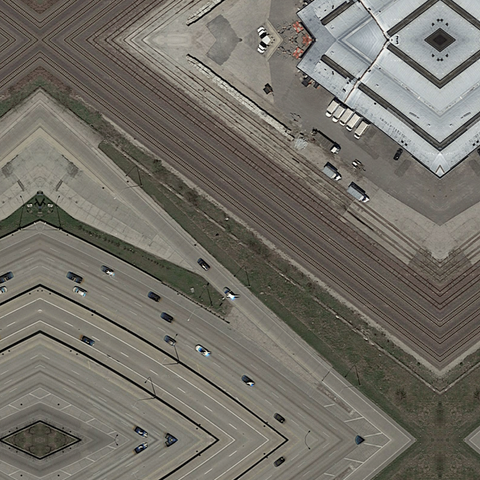

In [11]:
# im[0]

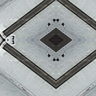

In [12]:
# item = train_dataset.__getitem__(24)

# patch = transforms.ToPILImage()(item['image'])
# patch

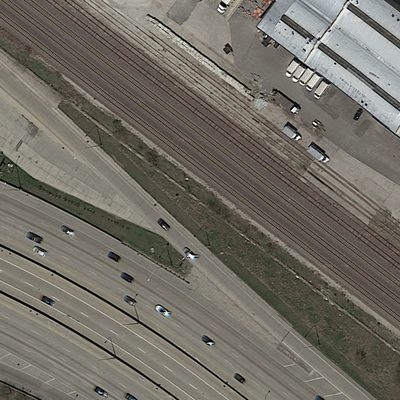

In [32]:
# def reconstruct_images(result, indices):
#     images = torch.zeros((indices.shape[0]//625,3, 400, 400))
    
#     for i in range(indices.shape[0]):
#         image_number = indices[i, 0]
        
#         start_x = indices[i, 1] * PATCH_SIZE
#         end_x = start_x + PATCH_SIZE
        
#         start_y = indices[i, 2] * PATCH_SIZE
#         end_y = start_y + PATCH_SIZE 
# #         print(transforms.ToTensor()(result[i]).size())
# #         print(x,y)
        
#         images[image_number,:, start_x:end_x, start_y:end_y] = transforms.ToTensor()(result[i])
        
#     return images

# first_im = []
# indices = np.zeros((625, 3), dtype=int)
# for i in range(625):
#     first_samp = train_dataset.__getitem__(i)
                               
#     first_im.append(F.center_crop(transforms.ToPILImage()(first_samp['image']), 16))
# #     print(first_im[i])
#     n_s_p_p_i = 25
#     p_s = 16
#     l_p_s = 96
#     padding = (l_p_s - p_s) // 2
        
#     y = ((i % n_s_p_p_i) * p_s)+padding
#     x = ((i// n_s_p_p_i) * p_s)+padding
#     x = (x-padding)//p_s
#     y = (y-padding)//p_s
#     indices[i] = np.array([0, x, y])

# reconstructed = reconstruct_images(first_im, indices)

# rec = transforms.ToPILImage()(reconstructed[0])
# rec